#### 1. "tidyverse", "data.table" 패키지를 부착하고 출력 그래프의 크기를 원하는 크기로 알맞게 설정하세요.

In [ ]:
install.packages("caret") #데이터 분할
library(caret)
library(tidyverse)
library(data.table)

library(repr)
options(repr.plot.width=10, repr.plot.height=7)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(ipred)
install.packages("adabag")
library(adabag)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("randomForest")
library(randomForest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin




####2. 제시된 titanic_train.csv(https://www.kaggle.com/c/titanic/data) 파일을 다운로드 받아 자신의 코랩에 저장한 후 titanic_raw에 tibble 형태로 읽어 들여 확인하세요.
(Hint) system(),fread()

In [ ]:
system("gdown --id 1eLaYZDYA1AJpm7KLIRjZa3YT_r9URqEZ")
system("ls", TRUE)

titanic_raw <- fread("/content/titanic_train.csv",header = T, encoding = "UTF-8") %>% as_tibble()
titanic_raw %>% show()

[1] "sample_data"       "titanic_train.csv"

# A tibble: 891 × 12
   PassengerId Survived Pclass Name   Sex     Age SibSp Parch Ticket  Fare Cabin
         <int>    <int>  <int> <chr>  <chr> <dbl> <int> <int> <chr>  <dbl> <chr>
 1           1        0      3 Braun… male     22     1     0 A/5 2…  7.25 ""   
 2           2        1      1 Cumin… fema…    38     1     0 PC 17… 71.3  "C85"
 3           3        1      3 Heikk… fema…    26     0     0 STON/…  7.92 ""   
 4           4        1      1 Futre… fema…    35     1     0 113803 53.1  "C12…
 5           5        0      3 Allen… male     35     0     0 373450  8.05 ""   
 6           6        0      3 Moran… male     NA     0     0 330877  8.46 ""   
 7           7        0      1 McCar… male     54     0     0 17463  51.9  "E46"
 8           8        0      3 Palss… male      2     3     1 349909 21.1  ""   
 9           9        1      3 Johns… fema…    27     0     2 347742 11.1  ""   
10          10        1      2 Nasse… fema…    14     1     0 237736 30.1  ""   
# ℹ 881

####3. 아래는 titanic_raw에서 팩터 형태로 저장되어야 하는 데이터를 확인하는 방법입니다. 데이터를 읽어 들이는 과정에서 팩터 데이터들의 타입이 변경되어 정수나 문자열로 지정되어 있습니다. 팩터 형태로 저장되어야 하는 데이터들을 팩터로 변경하고 분석에 영향을 미치지 않는 변수들은 제외하여 titanic에 저장하세요.

 (Hint) 분석에 영향을 미치지 않으므로 제외(-PassengerId, -Name, -Cabin, -Ticket), select(-)

 (Hint) 팩터("Survived", "Pclass", "Sex","Embarked")로 변경, mutate_at()


In [ ]:
titanic <-
  select(titanic_raw, -PassengerId, -Name , -Ticket , -Cabin) %>%
  #select(titanic_raw, PassengerId, Survived, Pclass, Sex, Age, SibSp, Parch, Fare, Embarked) %>%
  #select(titanic_raw, PassengerId, Survived, Pclass, Sex, Age, SibSp, Parch, Fare, Embarked) %>%
  mutate_at(c("Survived", "Pclass", "Sex", "Embarked"), factor)

titanic %>% str()
titanic %>% show()

tibble [891 × 8] (S3: tbl_df/tbl/data.frame)
 $ Survived: Factor w/ 2 levels "0","1": 1 2 2 2 1 1 1 1 2 2 ...
 $ Pclass  : Factor w/ 3 levels "1","2","3": 3 1 3 1 3 3 1 3 3 2 ...
 $ Sex     : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age     : num [1:891] 22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp   : int [1:891] 1 1 0 1 0 0 0 3 0 1 ...
 $ Parch   : int [1:891] 0 0 0 0 0 0 0 1 2 0 ...
 $ Fare    : num [1:891] 7.25 71.28 7.92 53.1 8.05 ...
 $ Embarked: Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...
 - attr(*, ".internal.selfref")=<externalptr> 
# A tibble: 891 × 8
   Survived Pclass Sex      Age SibSp Parch  Fare Embarked
   <fct>    <fct>  <fct>  <dbl> <int> <int> <dbl> <fct>   
 1 0        3      male      22     1     0  7.25 S       
 2 1        1      female    38     1     0 71.3  C       
 3 1        3      female    26     0     0  7.92 S       
 4 1        1      female    35     1     0 53.1  S       
 5 0        3      male      35     0     0 

####4. titanic %>% summary() 정보를 확인하면 모든 NA는 Age에서 발견됩니다. titanic 사고 시 사망자의 나이를 특정할 수 없을 수도 있을 것이라는 생각이 듭니다. NA의 삭제 여부는 분석자의 몫입니다. NA를 어떻게 처리할 생각이신가요? 이번 분석에서는 NA를 삭제하세요.
(Hint)Hmisc::impute(), na.omit()


In [ ]:
table(is.na(titanic))

titanic <- titanic %>% na.omit()

table(is.na(titanic))


FALSE  TRUE 
 6951   177 


FALSE 
 5712 

####5. titanic 데이터를 titanic$Survived를 기준으로 90%는 학습 데이터(train_titanic)로, 나머지는 테스트 데이터(test_titanic)로 분리하세요.
(Hint) caret::createDataPartition()

In [ ]:
set.seed(30)

index <- caret::createDataPartition(
  y = titanic$Survived, p=0.9, list=FALSE)

train_titanic <- titanic[index,]
test_titanic <- titanic[-index,]

####6.train_titanic 데이터와 ipred::bagging()을 이용하여 bagging 모델 bgm_titanic을 생성하고 확인하세요.
(Hint) ipred::bagging()


In [ ]:
bgm_titanic <-
  ipred::bagging(
    Survived ~ .,
    data = train_titanic,
    nbagg = 250
  )
summary(bgm_titanic)

Output hidden; open in https://colab.research.google.com to view.

#### 7. 모델 bgm_titanic을 사용하여 test_titanic 데이터로 예측을 수행한 후 예측값을predict_value_bg에 저장하고 확인하세요.
(Hint) predict()


In [ ]:
predict_value_bg <-
  predict(bgm_titanic, test_titanic, type = "class") %>%
    tibble(predict_value_bg = .)
predict_value_bg %>% show()

# A tibble: 71 × 1
   predict_value_bg
   <fct>           
 1 0               
 2 1               
 3 1               
 4 1               
 5 0               
 6 0               
 7 0               
 8 0               
 9 1               
10 0               
# ℹ 61 more rows


####8. test_titanic 데이터의 Survived와 위 문제에서 구한 predict_value_bg를 묶어 real_predict_bg티블에 저장하고 확인하세요.
(Hint) select(), bind_cols()

In [ ]:
real_predict_bg <-
  test_titanic %>%
    select(Survived) %>%
    dplyr::bind_cols(., predict_value_bg)

real_predict_bg %>% show()

# A tibble: 71 × 2
   Survived predict_value_bg
   <fct>    <fct>           
 1 0        0               
 2 1        1               
 3 0        1               
 4 1        1               
 5 0        0               
 6 0        0               
 7 0        0               
 8 0        0               
 9 1        1               
10 0        0               
# ℹ 61 more rows


####9. 위 real_predict_bg에 저장된 실제 값 Survived와 예측값 predict_value_bg 사이의 confusionMatrix를 생성한 후 정확도 및 성능지표를 확인하세요.
(Hint)caret::confusionMatrix()


In [ ]:
caret::confusionMatrix(
  real_predict_bg$Survived,
  real_predict_bg$predict_value_bg
)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 36  6
         1  6 23
                                          
               Accuracy : 0.831           
                 95% CI : (0.7234, 0.9095)
    No Information Rate : 0.5915          
    P-Value [Acc > NIR] : 1.351e-05       
                                          
                  Kappa : 0.6502          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.8571          
            Specificity : 0.7931          
         Pos Pred Value : 0.8571          
         Neg Pred Value : 0.7931          
             Prevalence : 0.5915          
         Detection Rate : 0.5070          
   Detection Prevalence : 0.5915          
      Balanced Accuracy : 0.8251          
                                          
       'Positive' Class : 0               
                                    

####10. train_titanic 데이터를 이용하여 Random Forests 모델 rfm_titanic을 생성하고 확인하세요.
(Hint) randomForest()

In [ ]:
rfm_titanic <- randomForest(
  Survived ~ .,
  data = train_titanic,
  #na.action = na.omit,
  importance = T,
  mtry = 8,
  ntree = 1000)

rfm_titanic %>% show()

Warning message in randomForest.default(m, y, ...):
“invalid mtry: reset to within valid range”



Call:
 randomForest(formula = Survived ~ ., data = train_titanic, importance = T,      mtry = 8, ntree = 1000) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 7

        OOB estimate of  error rate: 18.82%
Confusion matrix:
    0   1 class.error
0 328  54   0.1413613
1  67 194   0.2567050


####11. 모델 rfm_titanic을 사용하여 test_titanic 데이터로 예측을 수행한 후 예측값을 predict_value_rf에 저장하고 확인하세요.
(Hint) predict()

In [ ]:
predict_value_rf <-
  predict(rfm_titanic, test_titanic, type = "class") %>%
    tibble(predict_value_rf = .)
predict_value_rf %>% show()

# A tibble: 71 × 1
   predict_value_rf
   <fct>           
 1 0               
 2 1               
 3 1               
 4 1               
 5 0               
 6 0               
 7 0               
 8 0               
 9 1               
10 0               
# ℹ 61 more rows


####12. test_titanic 데이터의 Survived 데이터와 위 문제에서 구한 predict_value_rf를 묶어 real_predict_rf에 저장하고 확인하세요.
(Hint) select(), dplyr::bind_cols()

In [ ]:
real_predict_rf <-
  test_titanic %>%
    select(Survived) %>%
    dplyr::bind_cols(., predict_value_rf)

real_predict_rf %>% show()

# A tibble: 71 × 2
   Survived predict_value_rf
   <fct>    <fct>           
 1 0        0               
 2 1        1               
 3 0        1               
 4 1        1               
 5 0        0               
 6 0        0               
 7 0        0               
 8 0        0               
 9 1        1               
10 0        0               
# ℹ 61 more rows


####13. 위 real_predict_rf에 저장된 Survived와 predict_value_rf 사이의 confusionMatrix를 생성한 후 정확도 및 성능지표를 확인하세요.
(Hint) caret::confusionMatrix()

In [ ]:
caret::confusionMatrix(
  real_predict_rf$Survived,
  real_predict_rf$predict_value_rf
)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 36  6
         1  6 23
                                          
               Accuracy : 0.831           
                 95% CI : (0.7234, 0.9095)
    No Information Rate : 0.5915          
    P-Value [Acc > NIR] : 1.351e-05       
                                          
                  Kappa : 0.6502          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.8571          
            Specificity : 0.7931          
         Pos Pred Value : 0.8571          
         Neg Pred Value : 0.7931          
             Prevalence : 0.5915          
         Detection Rate : 0.5070          
   Detection Prevalence : 0.5915          
      Balanced Accuracy : 0.8251          
                                          
       'Positive' Class : 0               
                                    

####14. rfm_titanic의 변수 중요도를 그림으로 나타낸 후 성능에 가장 큰 영향을 미치는 설명변수를확인하세요.

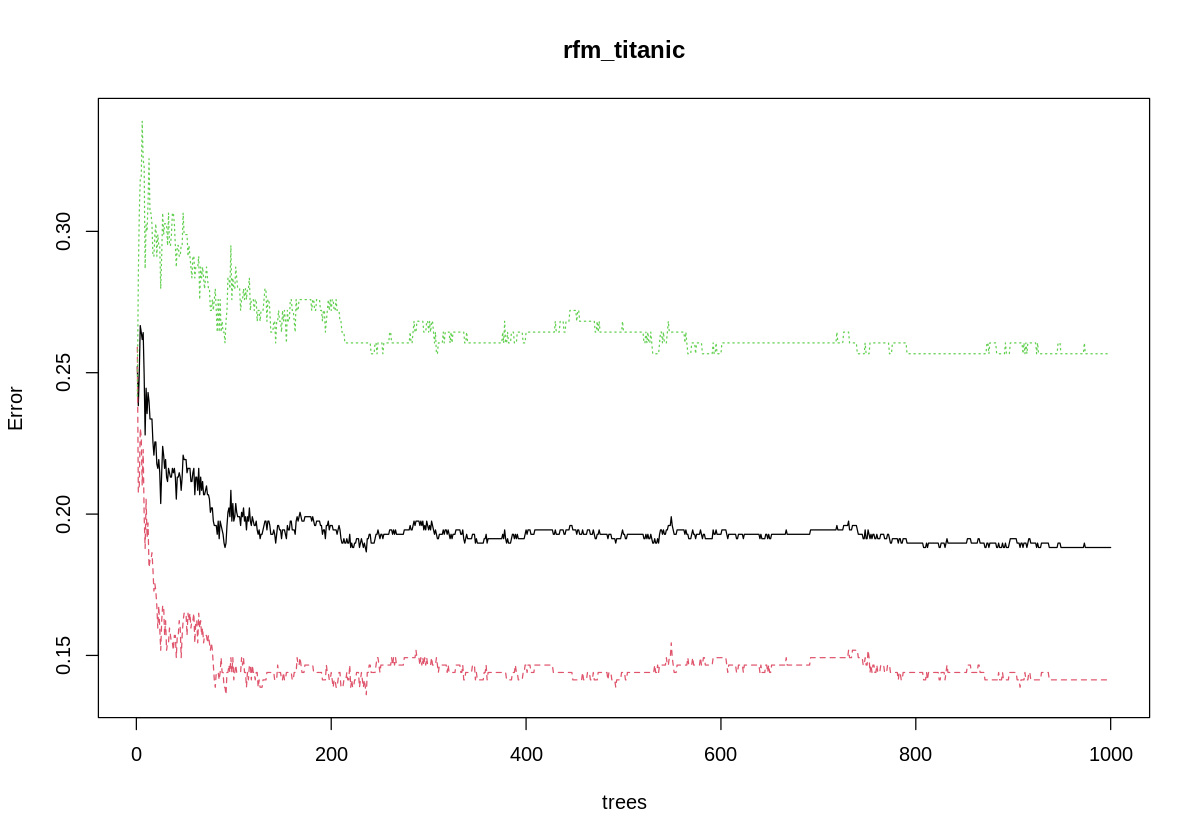

In [ ]:
plot(rfm_titanic)

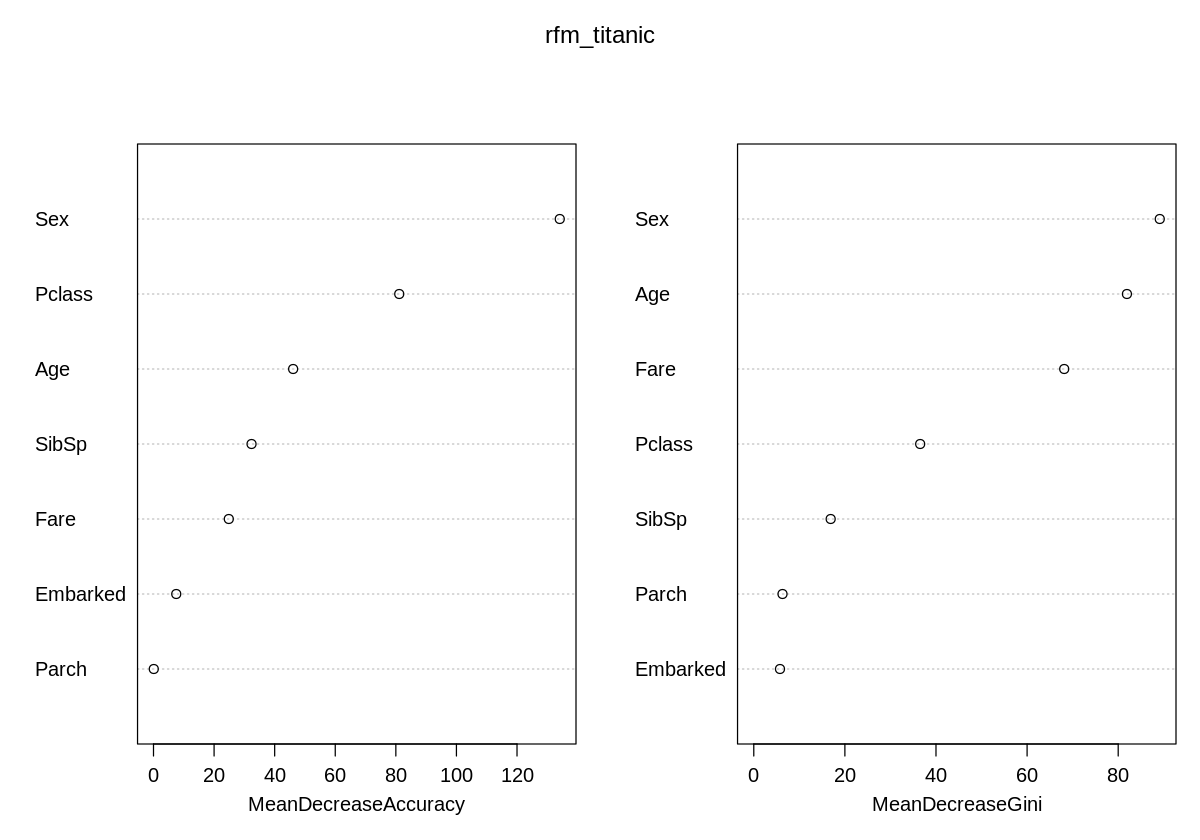

In [ ]:
varImpPlot(rfm_titanic)

####15. rfm_titanic, bgm_titanic, 지난 시간에 구한 DecisionTree 모델(dtm_pr_titanic), 로지스틱회귀모델(lorm_bw_titanic), 총 4가지의 confusionMatrix의 정확도 및 성능지표를 확인하세요. titanic_train 데이터의 경우 4가지 모델 중 어느 모델을 사용하는 것이 좋을까요?

###BG
Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 36  6
         1  6 23
                                          
               Accuracy : 0.831           
                 95% CI : (0.7234, 0.9095)
    No Information Rate : 0.5915          
    P-Value [Acc > NIR] : 1.351e-05       
                                          
                  Kappa : 0.6502          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.8571          
            Specificity : 0.7931          
         Pos Pred Value : 0.8571          
         Neg Pred Value : 0.7931          
             Prevalence : 0.5915          
         Detection Rate : 0.5070          
   Detection Prevalence : 0.5915          
      Balanced Accuracy : 0.8251          
                                          
       'Positive' Class : 0      



###RF             
Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 36  6
         1  6 23
                                          
               Accuracy : 0.831           
                 95% CI : (0.7234, 0.9095)
    No Information Rate : 0.5915          
    P-Value [Acc > NIR] : 1.351e-05       
                                          
                  Kappa : 0.6502          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.8571          
            Specificity : 0.7931          
         Pos Pred Value : 0.8571          
         Neg Pred Value : 0.7931          
             Prevalence : 0.5915          
         Detection Rate : 0.5070          
   Detection Prevalence : 0.5915          
      Balanced Accuracy : 0.8251          
                                          
       'Positive' Class : 0       